In [1]:
import pandas as pd
import leveldb
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
db = leveldb.LevelDB('./user_db')
total = 0
for k,v in db.RangeIter():
    total += 1
print total

12931


In [11]:
ur_sts = []
total = 0
pick = None
for k,v in db.RangeIter():
    u = json.loads(v)
    player_name = u['PlayerName']
    if player_name == 'shanibaba':
        pick = u
    for s in u['Stats']:
        if s['Season'] == '2017-pre4' and s['Region'] == 'as' and s['Match'] == 'squad':
            ur_st = s['Stats']
            ur_vals = {}
            for v in ur_st:
                ur_vals[v['field']] = float(v['value'])
            ur_vals['PlayerName'] = player_name
            ur_vals['DmgPerKill'] = ur_vals['DamagePg']/ur_vals['KillsPg']
            ur_sts.append(ur_vals)
user_df = pd.DataFrame(ur_sts)
if not pick is None:
    print pick

In [4]:
filter_too_high_kda = []
for u in ur_sts:
    if u['KillDeathRatio'] > 10.0:
        continue
    else:
        filter_too_high_kda.append(u)
filter_df = pd.DataFrame(filter_too_high_kda, columns=['Rating', 'KillDeathRatio', 'DamagePg', 'MoveDistancePg', 'DmgPerKill' ])
user_df.columns.values

array([u'Assists', u'AvgRideDistance', u'AvgSurvivalTime',
       u'AvgWalkDistance', u'BestRank', u'BestRating', u'Boosts', u'DBNOs',
       u'DailyKills', u'DamageDealt', u'DamagePg', u'Days', 'DmgPerKill',
       u'HeadshotKillRatio', u'HeadshotKills', u'HeadshotKillsPg',
       u'Heals', u'HealsPg', u'KillDeathRatio', u'Kills', u'KillsPg',
       u'LongestKill', u'LongestTimeSurvived', u'Losses',
       u'MaxKillStreaks', u'MostSurvivalTime', u'MoveDistance',
       u'MoveDistancePg', 'PlayerName', u'Rating', u'Revives',
       u'RevivesPg', u'RideDistance', u'RoadKills', u'RoadKillsPg',
       u'RoundMostKills', u'RoundsPlayed', u'Suicides', u'TeamKills',
       u'TeamKillsPg', u'TimeSurvived', u'TimeSurvivedPg', u'Top10Ratio',
       u'Top10s', u'Top10sPg', u'VehicleDestroys', u'WalkDistance',
       u'WeaponAcquired', u'WeeklyKills', u'WinPoints', u'WinRatio',
       u'WinTop10Ratio', u'Wins'], dtype=object)

In [5]:
filter_df[['Rating','KillDeathRatio','DamagePg', 'MoveDistancePg']]

,Rating,KillDeathRatio,DamagePg,MoveDistancePg
0,2225.0,0.82,139.91,4627.33
1,2192.0,2.05,260.69,3179.93
2,2275.0,1.62,209.99,3575.86
3,1655.0,1.33,188.12,2511.76
4,2378.0,0.71,100.51,3321.49
5,2207.0,1.66,233.25,2760.38
6,2418.0,2.03,195.73,4018.12
7,1873.0,0.72,104.11,2222.20
8,2189.0,1.01,163.44,3203.87
9,2276.0,1.96,267.45,3246.44


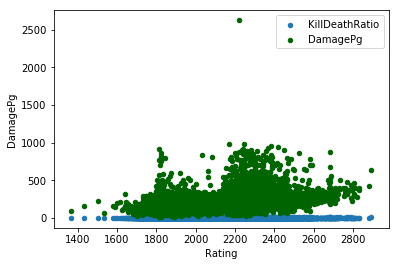

In [6]:
ax = filter_df.plot.scatter(x='Rating', y='KillDeathRatio', label='KillDeathRatio');
filter_df.plot.scatter(x='Rating', y='DamagePg', color='DarkGreen', label='DamagePg', ax=ax);

In [7]:
filter_df['Rating'].corr(filter_df['KillDeathRatio'])

0.34564356451928308

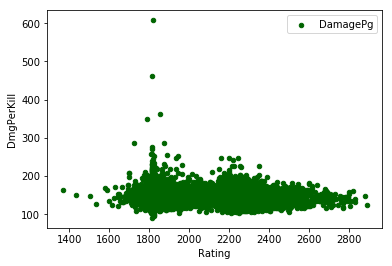

In [8]:
filter_df.plot.scatter(x='Rating', y='DmgPerKill', color='DarkGreen', label='DamagePg');

KeyError: 'RideDistance'

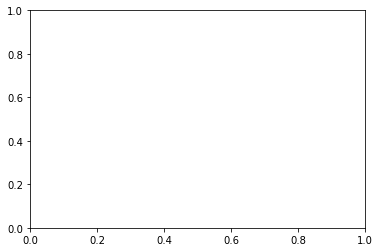

In [9]:
filter_df.plot.scatter(x='Rating', y='RideDistance', color='DarkGreen', label='RideDistance');

In [ ]:
len(ur_sts)
print(ur_sts[0])
cols = user_df.columns.values.tolist()
cols.append('PlayerName')
import csv
out = open('export.csv', 'w')
out_c = csv.writer(out)
out_c.writerow(cols)
for u in ur_sts:
    tmp = []
    for c in cols:
        tmp.append(u[c])
    out_c.writerow(tmp)
out.close()